### Week 10 
##### Working with Macros


[Demystifying the SAS® Macro Facility - by Example](https://support.sas.com/resources/papers/proceedings/proceedings/sugi31/251-31.pdf)

[MACRO PROCESSOR – The Masked Warrior](https://www.lexjansen.com/phuse/2009/tu/TU02.pdf)

```
# &syslast is an automatic variable
proc sort data=&syslast;
by study subject gender;
run;

# Macro with no paremeter
%macro sortit;
proc sort data=&syslast;
by study subject gender;
run;
%mend sortit;
%sortit
```

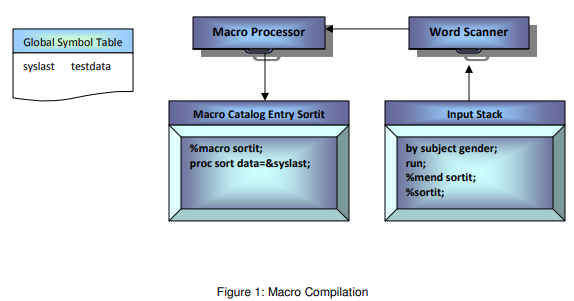

In [1]:
from IPython.display import Image
Image("C:/Data/Macro_Compilation.png")
# Source: As above.

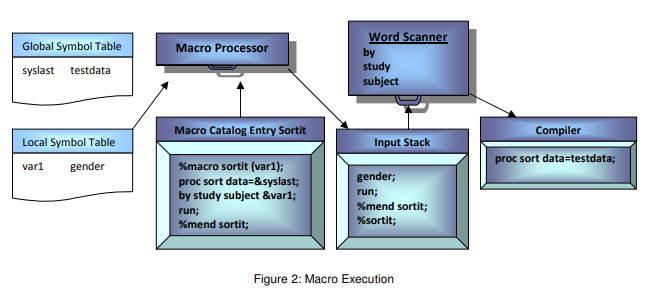

In [2]:
from IPython.display import Image
Image("C:/Data/Macro_Execution.png")
# Source: As above.

[Clarence Jackson, City of Dallas, Texas
73021.3404@compuserve.com    or    cj@zgnews.lonestar.org](file:///C:/SAS_Papers/SAS%20Macro%20Paper%20Outline.html)

"In many cases, it becomes inconvenient to keep redefining variables using Macro
%LET statements, so define the Macro variables as part of the %MACRO statement.
This can be done using either positional or keyword parameters. The following
illustrates both styles."

These parameters are actually the macro variables whose values are set in the macro call, that is, when the macro is invoked. Once the macro is compiled, you can invoke the macro mutiple times by changing the value of the macro variable(s).

```
positional parameters -

definition - %MACRO PLOT(YVAR,XVAR);
              PROC PLOT; PLOT &YVAR * &XVAR;
             %MEND PLOT;
call       - %PLOT(INCOME,AGE)

keyword parameters -
definition - %MACRO PLOT(YVAR=,XVAR=);
              PROC PLOT; PLOT &YVAR &VAR;
             %MEND PLOT;
call       - %PLOT(YVAR=INCOME,XVAR=AGE)
```

##### Creating macro variables using macros that contain positional and keyword parameters

##### Macro with a Single Positional Parameter (Note for the code in the next cell)
 
* The %macro statement declares the macro printit and defines its parameter dsn in parentheses.  In the code below, the parameter dsn is a local macro variable. 

* The macro “Body” includes the PROC step in the code example below. 

* The statement (%PUT \_LOCAL_;) is used to display the value of the local macro variables.  Below is the partial SAS Log.

* The end of the macro definition is marked by the %mend statement; specifying the macro name on this statement is a good programming style, but not required.

* %PRINTIT is the macro call; there is no semicolon after the macro call. The parameter value – sashelp.class - is supplied when the macro is called.

*  Note that the macro variable DSN is assigned a value sasahelp.class and written to the local symbol table for %PRINTIT after the %prinit (sashelp.class) is executed.


#### In the SAS log below, 
* PRINTIT is the name of the symbol table.
* DSN is the name of the macro variable.
* Sashelp.class is the current value of the macro variable.
(Reference: Carpenter, 2016; p. 418)



#### Macro with a Positional Parameter 
(multiple paramaters can be created by listing them with a comma between parameters)

*  Define the macro.
*  Create parameter(s) by listing variables in a set of parentheses in the %macro statement.
* Invoke the same macro in three separate macro calls, supplying to each call parameter values.

Note: The paramters are nothing but macro variables for use within the macro.

There are two types of parameters: positional and keyword

In [9]:
*Ex16_posi_key_para_macro.sas (Part 1);
options nocenter nodate nonotes nosource obs=5;
ods html close;
%macro printit(dsn);
  proc print data=&dsn;
  run;
%put _local_;
%mend printit;
%printit (sashelp.class)

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5


In [10]:
%showLog

Keyword parameters are defined using the parameter name with an equal sign.
```
Advantages:
* They are not required to be defined and passed in the same order.
* The default values can be used.
```

In [1]:
*Ex16_posi_key_para_macro.sas (Part 2);
%MACRO printdata(dsn, num=);
  PROC PRINT DATA=&dsn (obs=&num) noobs;
  %put _local_;
RUN;
%MEND printdata;
%printdata(SASHELP.CLASS, num=3)
%printdata(num=4, SASHELP.IRIS)
%printdata(SASHELP.CLASSFIT, num=2)


SAS Connection established. Subprocess id is 15424



In the following example, the default value is assigned to the macro parameter.

```
%MACRO printdata(dsn, num=5);
  PROC PRINT DATA=&dsn (obs=&num) noobs;
  %put _local_;
RUN;
%MEND printdata;
%printdata(SASHELP.CLASS)
%printdata(SASHELP.IRIS)
%printdata(SASHELP.CLASSFIT)
```

### Macro with keyword parameters (Another example)
Contributed to SAS-L by Ron Fehd  - 8/17/2017

In [7]:
*Ex13_macro.sas;
*Contributed to SAS-L by Ron RJF Fehd  - 8/17/2017 and Adapted here;
options obs=max nodate nonumber nosource symbolgen;
ods html close;
 
%macro means(data  = sashelp.class
            ,var   = height
            ,where = 1);
proc means data  = &data
          (where =(&where));
           var     &var;
     title "&data &var &where";
run;
%mend means;
%means()
%means(where=sex eq 'F')
%means(where=sex eq 'M')

%means(var=weight)
%means(var=weight,where=sex eq 'F')
%means(var=weight,where=sex eq 'M')

%means(data=sashelp.shoes,var=sales)


 ###  PARMBUFF option in the macro definition 
 
There may be a stuation when you want to write a macro containing a variable number of parameters. Use the PARMBUFF option with the macro name. 

With this option in the macro definition, the list of values specified in the macro call is passed into the automatic macro variable SYSPBUFF.

Notice that the resolved value of the macro variable reference &SYSPBUFF  also includes the () and the commas. 

&SYSBUFF is found in the symbol table that is local to the executing macro.

In [5]:
options nocenter nonumber nodate nonotes nosource;
ods html close;
%macro mymacro/PARMBUFF;
   %put varlist: &=SYSPBUFF;
   %put Parentheses and commas deleted: %sysfunc(translate(&syspbuff,%str( ),    (,)      ));
%mend mymacro;
%mymacro (age, sex, weight, height)


In [6]:
* Macro with a positional parameter - %sysfunc (Source: SAS Documentation);
proc format;
  value category
  Low-<0  = 'Less Than Zero'
  0       = 'Equal To Zero'
  0<-high = 'Greater Than Zero'
  other   = 'Missing';
run;
%macro try(parm);
  %put &parm is %sysfunc(putn(&parm,category.));
%mend;
%try(1.02)
%try(.)
%try(-.38)

##### Macro with automatic macro variables
 Authored by SAS(R) Instutute - Received from SAS Technical Support

In [ ]:
*Ex12_GetInfo_Host_Computer;
*Authored by SAS(R) Instutute - Received from SAS Technical Support;
options nodate nonumber symbolgen;
ods html close;
%macro getInfo;
  options nosyntaxcheck ;
  LIBNAME _ALL_ LIST;
  %put Site Number: &syssite ;
  %put Host OS: &sysscp; %put &sysscpl;
  %put Hostname: &systcpiphostname ;
  %put Process: &sysprocessname ;
  %put SAS Version: &sysvlong ;
  %let sasroot=%sysget(SASROOT) ;
  %put SASROOT: &sasroot ;
  %put USER: &sysuserid ;
  %put Bitness: &SYSADDRBITS ;
  %put Username: %SYSGET(USERNAME) ;
  %put Random: %SYSGET(SAS_NO_RANDOM_ACCESS) ;
  %put This job started on &sysdate at &systime;
%mend ;
%getInfo 

[Give Your Macro Code an Extreme Makeover:Tips for even the most seasoned macro programmer By: Russ Tyndall ](http://support.sas.com/techsup/technote/ts739.pdf)

In [1]:
* Capture the conditional logic in the macro;
options nocenter nodate nonumber nosource;
ods html close;
%macro checkds(dsn);
   %if %sysfunc(exist(&dsn)) %then
      %do;
         proc print data=&dsn (obs=5);
         run;
      %end;
      %else
       %do;
         %put The data set &dsn does not exist.;
       %end;  
%mend checkds;
%checkds(sashelp.class)

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5


Starting with the SAS 9.4M5 release, you can remove the %MACRO/%MEND wrapper and the macro call. See the code below.

In [2]:
options nocenter nodate nonumber nosource;
ods html close;
   %if %sysfunc(exist(SASHELP.CLASS)) %then
      %do;
         proc print data=SASHELP.CLASS (obs=5);
         run;
      %end;
      %else
       %do;
         %put The data set SASHELP.CLASS does not exist.;
       %end;

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5


[Restriction: In open code, the ACTION that is associated with both the %THEN and %ELSE statements must be a %DO statement.](https://go.documentation.sas.com/doc/en/pgmmvacdc/9.4/mcrolref/n18fij8dqsue9pn1lp8436e5mvb7.htm)


Below are two macros with no parameters.

In [3]:
options nonotes nodate nonumber nosource;
ods html close;
%macro getInfo;
  options nosyntaxcheck ;
  %put Site Number: &syssite ;
  %put Host OS: &sysscp; %put &sysscpl;
  %put SAS Version: &sysvlong ;
  %put USER: &sysuserid ;
  %put Username: %SYSGET(USERNAME) ;
  %put Random: %SYSGET(SAS_NO_RANDOM_ACCESS) ;
  %put This job started on &sysdate at &systime;
%mend getinfo ;
%getInfo


The SAS System

NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
Site Number: 70158136
Host OS: WIN
X64_10PRO
SAS Version: 9.04.01M7P080520
USER: muhuri
Username: muhuri
Random: 1
This job started on 23MAR25 at 23:05

The SAS System

E3969440A681A2408885998500000005


In [4]:
options nosource nodate nonumber;
%let course=STAT 4197;
%macro mymacro;
   %let course=STAT 6197;
   %put The value of the macro variable inside MYMACRO is &course;
   %put _user_;
%mend mymacro;
%mymacro
%put The value of macro variable course outside MYMACRO is &course;

https://v8doc.sas.com/sashtml/macro/z0206835.htm

In [3]:
options nosource nodate nonumber;
%let course=STAT 4197;
%macro mymacro;
   %local course;
   %let course=STAT 6197;
   %put The value of the macro variable inside MYMACRO is &course;
   %put _user_;
%mend mymacro;
%mymacro
%put The value of macro variable course outside MYMACRO is &course;